# Data Selection

## Preguntas

- ¿Cuales secuencias son válidas para el análisis?
- ¿Cuál es y cómo se ve la relación entre las secuencias? (Orthogroups)
- ¿Qué relaciones son significativas? (Orthologs 1v1)
- ¿Los resultados generados son realmente válidos? (MSA)
- ¿Qué función cumplen estos grupos? ¿Es esta función importante?

In [6]:
import pandas as pd

In [2]:
import os
from Bio import SeqIO
import matplotlib.pyplot as plt

# Ajustar tamaño de fuente global para una mejor legibilidad
plt.rcParams.update({'font.size': 12})

# Carpeta con los FASTA
folder = "./batch1"

# Recolectar datos
files = sorted(os.listdir(folder))
contig_counts = {}
total_lengths = {}

for fname in files:
    path = os.path.join(folder, fname)
    count = 0
    length_sum = 0
    for record in SeqIO.parse(path, "fasta"):
        count += 1
        length_sum += len(record.seq)
    contig_counts[fname] = count
    total_lengths[fname] = length_sum


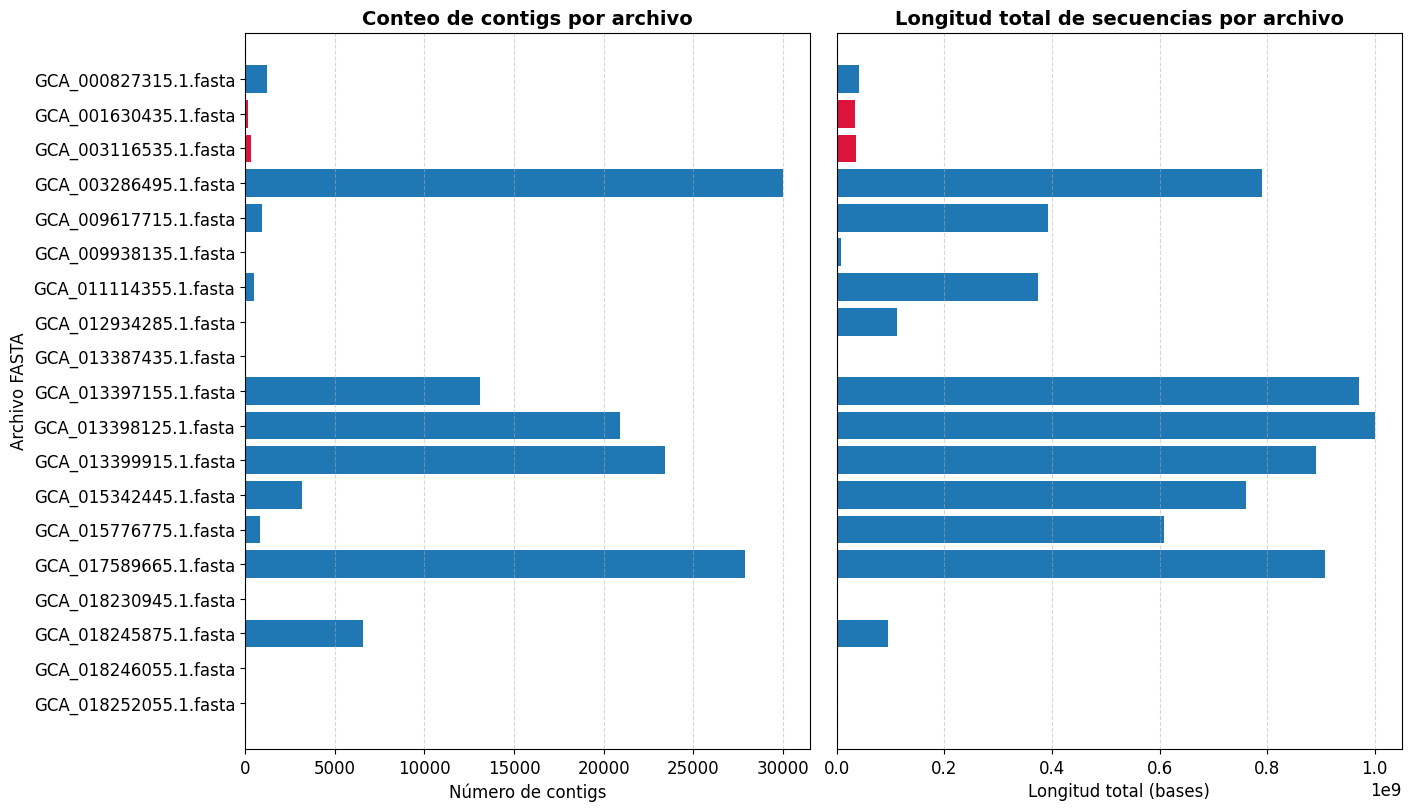

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear figura y subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8), constrained_layout=True)

# Elegir una paleta más armónica
base_color = plt.cm.tab10
highlight_color = 'crimson'

# Crear lista de colores con mejor diseño
color_list = [base_color(0)] * len(total_lengths.keys())
color_list[1:3] = [highlight_color, highlight_color]  # resaltar dos archivos

# Gráfico 1: número de contigs por archivo (horizontal)
ax1.barh(list(contig_counts.keys()), list(contig_counts.values()), color=color_list, edgecolor='none')
ax1.set_xlabel("Número de contigs", fontsize=12)
ax1.set_ylabel("Archivo FASTA", fontsize=12)
ax1.set_title("Conteo de contigs por archivo", fontsize=14, weight='bold')
ax1.invert_yaxis()
ax1.grid(axis='x', linestyle='--', alpha=0.5)

# Gráfico 2: longitud total de secuencias por archivo (horizontal)
ax2.barh(list(total_lengths.keys()), list(total_lengths.values()), color=color_list, edgecolor='none')
ax2.set_xlabel("Longitud total (bases)", fontsize=12)
ax2.set_title("Longitud total de secuencias por archivo", fontsize=14, weight='bold')
ax2.set_yticks([])  # Remueve las etiquetas y ticks del eje y derecho
ax2.invert_yaxis()
ax2.grid(axis='x', linestyle='--', alpha=0.5)

# Mostrar
plt.show()
fig.savefig('assets/fig1.png', dpi=300)  

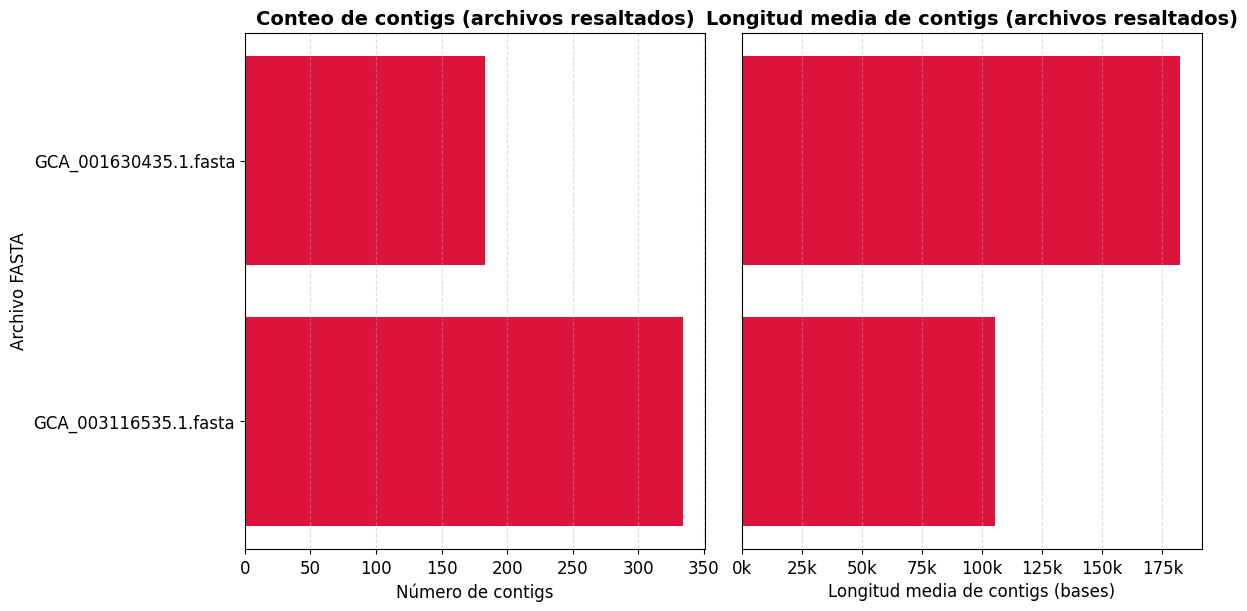

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Obtener las claves de los archivos resaltados (índices 1 y 2)
highlight_keys = list(total_lengths.keys())[1:3]

# Filtrar los datos solo para los archivos resaltados
filtered_contigs = {k: contig_counts[k] for k in highlight_keys}
filtered_lengths = {k: total_lengths[k] for k in highlight_keys}

# Calcular longitud media de los contigs
avg_lengths = {
    k: filtered_lengths[k] / filtered_contigs[k]
    for k in highlight_keys
}

# Función para formatear los números como '5k' en lugar de '5000'
def thousands_formatter(x, pos):
    return f'{x//1000:.0f}k'

# Crear figura y subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)

# Color destacado
color_list = ['crimson'] * 2

# Gráfico 1: número de contigs por archivo (horizontal)
ax1.barh(list(filtered_contigs.keys()), list(filtered_contigs.values()), color=color_list, edgecolor='none')
ax1.set_xlabel("Número de contigs", fontsize=12)
ax1.set_ylabel("Archivo FASTA", fontsize=12)
ax1.set_title("Conteo de contigs (archivos resaltados)", fontsize=14, weight='bold')
ax1.invert_yaxis()
ax1.grid(axis='x', linestyle='--', alpha=0.4)

# Gráfico 2: longitud media de contigs por archivo (horizontal)
ax2.barh(list(avg_lengths.keys()), list(avg_lengths.values()), color=color_list, edgecolor='none')
ax2.set_xlabel("Longitud media de contigs (bases)", fontsize=12)
ax2.set_title("Longitud media de contigs (archivos resaltados)", fontsize=14, weight='bold')
ax2.set_yticks([])
ax2.invert_yaxis()
ax2.grid(axis='x', linestyle='--', alpha=0.4)

# Aplicar formateador personalizado al eje x del segundo gráfico
ax2.xaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Mostrar
plt.show()
fig.savefig('assets/fig2.png', dpi=300)  

In [5]:
highlight_keys

['GCA_001630435.1.fasta', 'GCA_003116535.1.fasta']

In [25]:
og = pd.read_csv("batch2/OrthoFinder/Orthogroups/Orthogroups.tsv", sep="\t")
og_sc = pd.read_csv("batch2/OrthoFinder/Orthogroups/Orthogroups_SingleCopyOrthologues.txt", header=None, names=["Orthogroup"])

In [ ]:
og.set_index("Orthogroup", inplace=True)
og_sc.set_index("Orthogroup", inplace=True)

In [53]:
og_groups = og_sc.join(og)

In [58]:
# Buscamos ahora todos los contigs 
secuencias = list(og_groups.columns)

In [67]:
S_globosa = og_groups["GCA_001630435.1"]
P_niveus = og_groups["GCA_003116535.1"]

In [97]:
S_globosa = list(S_globosa.str.replace("_",":"))
P_niveus = list(P_niveus.str.replace("_",":"))

In [99]:
from collections import defaultdict
seq_dict = defaultdict(list)
for seq in secuencias:
    for contig in SeqIO.parse(f"batch2/{seq}.fasta", "fasta"):
        if contig.id in S_globosa:
            seq_dict["S_globosa"].append(contig.seq)
        if contig.id in P_niveus:
            seq_dict["P_niveus"].append(contig.seq)


In [103]:
og_groups

,GCA_001630435.1,GCA_003116535.1
Orthogroup,,
OG0000010,LVYW01000001.1_1402104-1580686,QEIL01000127.1_0-74927
OG0000012,LVYW01000002.1_682986-838637,QEIL01000045.1_0-147919
OG0000015,LVYW01000004.1_2454887-2540366,QEIL01000085.1_0-185295
OG0000016,LVYW01000004.1_2540376-3489359,QEIL01000164.1_0-57946


/home/xkalibur/miniconda3/envs/DPD/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/xkalibur/miniconda3/envs/DPD/lib/python3.13/site-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


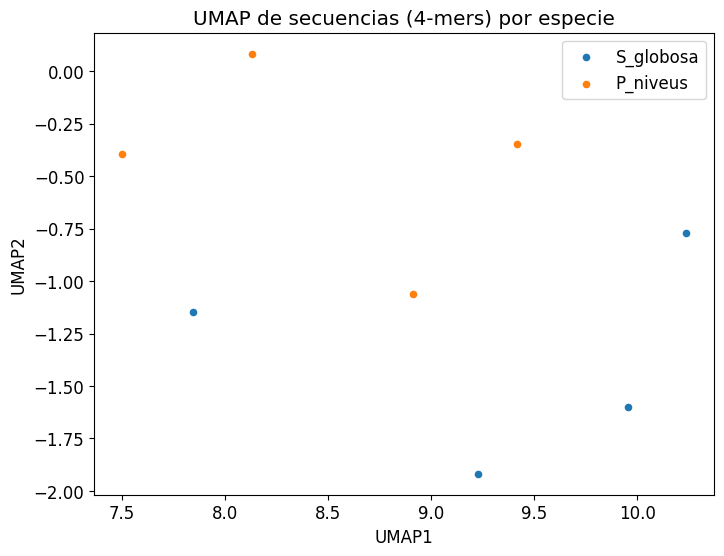

In [115]:
from sklearn.feature_extraction.text import CountVectorizer
import umap
import matplotlib.pyplot as plt

seqs = []
labels = []

for species, seq_list in seq_dict.items():
    for s in seq_list:
        seqs.append(str(s))
        labels.append(species)

# 2) Vectorización con k-mers
k = 4
vec = CountVectorizer(analyzer="char", ngram_range=(k, k))
X = vec.fit_transform(seqs).toarray()

# 3) UMAP
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1)
X_umap = reducer.fit_transform(X)

# 4) Visualización con colores por especie
plt.figure(figsize=(8,6))
for species in set(labels):
    idx = [i for i, label in enumerate(labels) if label == species]
    plt.scatter(X_umap[idx,0], X_umap[idx,1], s=20, label=species)

plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.title("UMAP de secuencias (4-mers) por especie")
plt.legend()
plt.savefig('assets/fig3.png', dpi=300)  
plt.show()

In [128]:
seq_dict

defaultdict(list,
            {'S_globosa': [Seq('ccccccccccccccccccttcccccgTTGGCAAGCTAGAAACCTCCGCTTGCGC...ccc'),
              Seq('gggggggggggggggggggggggggggggggggaagaAAGCGAGGGGAGAAGGG...GGG'),
              Seq('CCCCCCCCATTACTCCATCCACCCACTTTCCGTTTCCTCGCTTCTCCATTAATA...GGG'),
              Seq('AAACAATATTGTTATCCGACGTTGTTGGTTGACCTAGGTATATTCGCAAACATG...ggg')],
             'P_niveus': [Seq('agagctaataaaataggatccattttgatgatttggtgggtagttgaataaact...aaa'),
              Seq('cttcggataccctcagccaacccatggagctcttgagctccttatctcgacacc...AAA'),
              Seq('cgagctagatgatattatagcacacagctatctagcacacagccatcatctaga...TGC'),
              Seq('CCCCCCCGCTCTCGCCCCAatcgcagaagaaaaaagcgACAATGCAAGGCAGAT...ata')]})

In [130]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
seq1 = seq_dict["S_globosa"][0]
seq2 = seq_dict["P_niveus"][0]
records = []
record_id = f"{"S_globosa"}_1"
sequence = Seq(seq1)
record = SeqRecord(sequence, id=record_id, description="")
records.append(record)
record_id2 = f"{"S_niveus"}_1"
sequence2 = Seq(seq2)
record2 = SeqRecord(sequence2, id=record_id2, description="")
records.append(record2)

output_file = "output.fasta"
with open(output_file, "w") as output_handle:
    SeqIO.write(records, output_handle, "fasta")

In [132]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
seq3 = seq_dict["S_globosa"][1]
seq4 = seq_dict["P_niveus"][1]
records2 = []
record_id3 = f"{"S_globosa"}_2"
sequence3 = Seq(seq3)
record3 = SeqRecord(sequence3, id=record_id3, description="")
records2.append(record3)
record_id4 = f"{"S_niveus"}_2"
sequence4 = Seq(seq4)
record4 = SeqRecord(sequence4, id=record_id4, description="")
records2.append(record4)

output_file2 = "output2.fasta"
with open(output_file2, "w") as output_handle:
    SeqIO.write(records2, output_handle, "fasta")

In [124]:
# query for blastn
s1 = seq_dict['S_globosa'][0]
with open("s1.txt", "w") as f:
    f.write(str(s1))